In [290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [291]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv', encoding='latin-1')

## Preprocessing

In [292]:
data.shape

(7920, 3)

In [52]:
data.groupby('tweet').describe()

id                      \
                                                   count    mean std     min   
tweet                                                                          
 #Thanksgiving! Decided to forgo the traditiona...   1.0  3471.0 NaN  3471.0   
 when itunes decides to restore my ENTIRE phone...   1.0  6002.0 NaN  6002.0   
# valentine's #day :) #yellow #nails #brown #ha...   1.0  7315.0 NaN  7315.0   
#$&@*# apple you #suck RT @PCMag: Report: Apple...   1.0  3058.0 NaN  3058.0   
#100happydays day12: DIY cord protector. Thanks...   1.0  2032.0 NaN  2032.0   
...                                                  ...     ...  ..     ...   
â #FOLLOWTRICK â RETWEET â FOLLOW ALL WHO...   1.0  2026.0 NaN  2026.0   
â #FOLLOWTRICK â RETWEET â FOLLOW ALL WHO...   1.0  7847.0 NaN  7847.0   
æå¥½çä¹ oneplus_official oneplus_gallery @...   1.0  1800.0 NaN  1800.0   
îHappy Birthday Steve Jobs!! î
You have made...   1.0  7632.0 NaN  7632.0   
ï½¡â· ð ðððð-ððð¶ð¹ ð...   1.0  1076.0 NaN  1076.0   

                                                                            \
                                                       25%     50%     75%   
tweet                                                                        
 #Thanksgiving! Decided to forgo the traditiona...  3471.0  3471.0  3471.0   
 when itunes decides to restore my ENTIRE phone...  6002.0  6002.0  6002.0   
# valentine's #day :) #yellow #nails #brown #ha...  7315.0  7315.0  7315.0   
#$&@*# apple you #suck RT @PCMag: Report: Apple...  3058.0  3058.0  3058.0   
#100happydays day12: DIY cord protector. Thanks...  2032.0  2032.0  2032.0   
...                                                    ...     ...     ...   
â #FOLLOWTRICK â RETWEET â FOLLOW ALL WHO...  2026.0  2026.0  2026.0   
â #FOLLOWTRICK â RETWEET â FOLLOW ALL WHO...  7847.0  7847.0  7847.0   
æå¥½çä¹ oneplus_official oneplus_gallery @...  1800.0  1800.0  1800.0   
îHappy Birthday Steve Jobs!! î
You have made...  7632.0  7632.0  7632.0   
ï½¡â· ð ðððð-ððð¶ð¹ ð...  1076.0  1076.0  1076.0   

                                                           label           \
                                                       max count mean std   
tweet                                                                       
 #Thanksgiving! Decided to forgo the traditiona...  3471.0   1.0  0.0 NaN   
 when itunes decides to restore my ENTIRE phone...  6002.0   1.0  1.0 NaN   
# valentine's #day :) #yellow #nails #brown #ha...  7315.0   1.0  0.0 NaN   
#$&@*# apple you #suck RT @PCMag: Report: Apple...  3058.0   1.0  1.0 NaN   
#100happydays day12: DIY cord protector. Thanks...  2032.0   1.0  0.0 NaN   
...                                                    ...   ...  ...  ..   
â #FOLLOWTRICK â RETWEET â FOLLOW ALL WHO...  2026.0   1.0  0.0 NaN   
â #FOLLOWTRICK â RETWEET â FOLLOW ALL WHO...  7847.0   1.0  0.0 NaN   
æå¥½çä¹ oneplus_official oneplus_gallery @...  1800.0   1.0  0.0 NaN   
îHappy Birthday Steve Jobs!! î
You have made...  7632.0   1.0  0.0 NaN   
ï½¡â· ð ðððð-ððð¶ð¹ ð...  1076.0   1.0  0.0 NaN   

                                                                             
                                                    min  25%  50%  75%  max  
tweet                                                                        
 #Thanksgiving! Decided to forgo the traditiona...  0.0  0.0  0.0  0.0  0.0  
 when itunes decides to restore my ENTIRE phone...  1.0  1.0  1.0  1.0  1.0  
# valentine's #day :) #yellow #nails #brown #ha...  0.0  0.0  0.0  0.0  0.0  
#$&@*# apple you #suck RT @PCMag: Report: Apple...  1.0  1.0  1.0  1.0  1.0  
#100happydays day12: DIY cord protector. Thanks...  0.0  0.0  0.0  0.0  0.0  
...                                                 ...  ...  ...  ...  ...  
â #FOLLOWTRICK â RETWEET â FOLLOW ALL WHO...  0.0  0.

In [293]:
data = data.drop_duplicates()

### Text Preprocessing

In [294]:
import re
import string

In [79]:
!pip install nltk

In [295]:
import nltk

In [81]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [296]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [297]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [298]:
def preprocessing(text):
    # Convert to lowercase and split
    text = text.lower()
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove punctuation and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(word) for word in text.split() if word not in sw]
    return " ".join(words)

In [299]:
data['tweet'] = data['tweet'].apply(preprocessing)

In [300]:
data.head()

,id,label,tweet
0,1,0,fingerprint pregnancy test android apps beauti...
1,2,0,finally transparant silicon case thanks uncle ...
2,3,0,love would go talk makememories unplug relax i...
3,4,0,im wired know im george made way iphone cute d...
4,5,1,amazing service apple wont even talk question ...


## divide dataset

In [97]:
!pip install scikit-learn

In [301]:
from sklearn.model_selection import train_test_split
x = data['tweet']
y = data['label']

In [302]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

## vectorization

In [303]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=10000
)

In [304]:
vectorized_x_train = vectorizer.fit_transform(x_train)

In [305]:
vectorized_x_test = vectorizer.transform(x_test)

In [306]:
import pickle

with open ('../static/model/vectorizer.pickle', 'wb') as f:
    pickle.dump(vectorizer, f)

## check data set

In [307]:
y_train.value_counts()

label
0    4692
1    1644
Name: count, dtype: int64

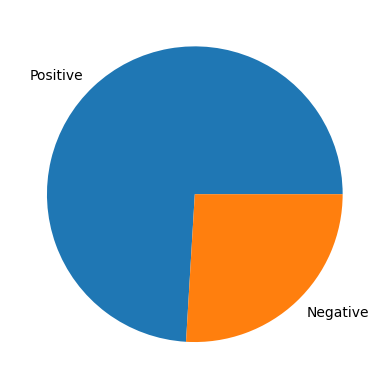

In [308]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels = ["Positive", "Negative"])
plt.show()

## handle imbalanced dataset

In [105]:
!pip install imbalanced-learn

In [309]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)

In [310]:
y_train_smote.value_counts()

label
0    4692
1    4692
Name: count, dtype: int64

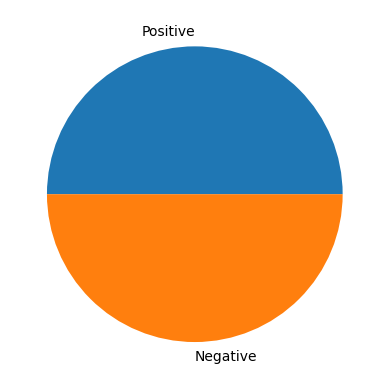

In [311]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels = ["Positive", "Negative"])
plt.show()

In [312]:
x_train = vectorized_x_train_smote 
y_train = y_train_smote
x_test = vectorized_x_test

# Model Building and Evaluations

In [313]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

### Evaluate model

In [314]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [315]:
def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pre = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Score :\n\tAccuracy = {acc}\n\tPrecision = {pre}\n\tRecall = {rec}\n\tF1-Score = {f1}')

In [316]:
def validating_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pre = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Score :\n\tAccuracy = {acc}\n\tPrecision = {pre}\n\tRecall = {rec}\n\tF1-Score = {f1}')

Logistic Regression

In [317]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(x_train, y_train)

y_train_pred = lr.predict(x_train)
training_scores(y_train, y_train_pred)

y_test_pred = lr.predict(x_test)
validating_scores(y_test, y_test_pred)

Training Score :
	Accuracy = 0.951
	Precision = 0.932
	Recall = 0.971
	F1-Score = 0.952
Testing Score :
	Accuracy = 0.896
	Precision = 0.742
	Recall = 0.874
	F1-Score = 0.803


Naive Bayes

In [176]:
nb = MultinomialNB()
nb.fit(x_train, y_train)

y_train_pred = nb.predict(x_train)
training_scores(y_train, y_train_pred)

y_test_pred = nb.predict(x_test)
validating_scores(y_test, y_test_pred)

Training Score :
	Accuracy = 0.932
	Precision = 0.885
	Recall = 0.992
	F1-Score = 0.936
Testing Score :
	Accuracy = 0.862
	Precision = 0.664
	Recall = 0.946
	F1-Score = 0.781


Decision Tree

In [177]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_train_pred = dtc.predict(x_train)
training_scores(y_train, y_train_pred)

y_test_pred = dtc.predict(x_test)
validating_scores(y_test, y_test_pred)

Training Score :
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Score :
	Accuracy = 0.824
	Precision = 0.666
	Recall = 0.641
	F1-Score = 0.653


Random Forest

In [178]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_train_pred = rf.predict(x_train)
training_scores(y_train, y_train_pred)

y_test_pred = rf.predict(x_test)
validating_scores(y_test, y_test_pred)

Training Score :
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Score :
	Accuracy = 0.878
	Precision = 0.758
	Recall = 0.773
	F1-Score = 0.766


Support Vector Machine

In [181]:
svm = SVC()
svm.fit(x_train, y_train)

y_train_pred = svm.predict(x_train)
training_scores(y_train, y_train_pred)

y_test_pred = svm.predict(x_test)
validating_scores(y_test, y_test_pred)

Training Score :
	Accuracy = 0.995
	Precision = 0.992
	Recall = 0.999
	F1-Score = 0.995
Testing Score :
	Accuracy = 0.882
	Precision = 0.767
	Recall = 0.78
	F1-Score = 0.774


# Save Model

In [318]:
with open ('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)